In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def propTF(uin_V_m, L_m, lambda_m, z_m):
    M = uin_V_m.size        # number of samples (grid points)
    dx_m = L_m/M            # grid spacing
    k_1_m = 2*np.pi/lambda_m # wavenumber

    # Frequency coordinates
    fx_1_m = np.linspace(-1/(2*dx_m), 1/(2*dx_m) - (1/L_m), M)
    
    # Transfer function for Fresnel propagation
    H = np.exp(-1j * np.pi * lambda_m * z_m * (fx_1_m**2))
    H = np.fft.fftshift(H)

    # Fourier transform input field
    Uin_V_m = np.fft.fft(np.fft.fftshift(uin_V_m))

    # Multiply in Fourier space
    Uout_V_m = H * Uin_V_m

    # Inverse FFT → propagated field
    uout_V_m = np.fft.ifftshift(np.fft.ifft(Uout_V_m))
    return uout_V_m

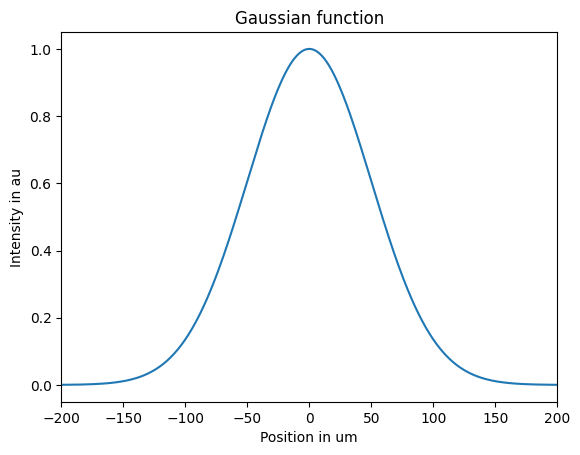

In [3]:
dx_m = 1e-6 #grid size, m:meter
Dx_m = 1 #screen size
x_m = np.linspace(-Dx_m/2, Dx_m/2, int(Dx_m/dx_m)+1) #spatial grid along x-axis 

x_mean_m = 0.0 #centered on...
x_std_m = 50e-6 #widthofgaussian
g = np.exp(-(x_m - x_mean_m)**2/(2*(x_std_m**2))) # gaussian intensity distribution 
plt.plot(x_m*1e6, g)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au") #arbitrary units
plt.title("Gaussian function")
plt.xlim(-200, 200)
plt.show()

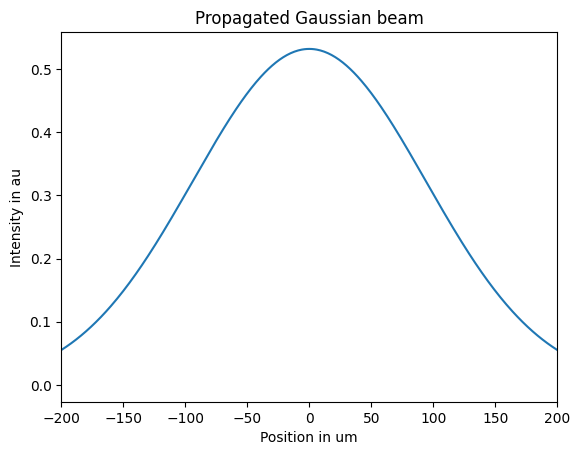

In [4]:
#initial beam electric field

wavelength_m = 500e-9 #wavelength, m
zp_m = 100e-3 #propagation distance, m

E0 = np.sqrt(g) # initial field amplitude squared equals the Gaussian intensity defined earlier 
Ep = propTF(E0, Dx_m, wavelength_m, zp_m) # propTF propagates that field forward by a distance zp_m 

Ip = np.abs(Ep)**2 # intensity 

plt.plot(x_m*1e6, Ip)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au") #arbitrary units
plt.title("Propagated Gaussian beam")
plt.xlim(-200, 200)
plt.show()


In [5]:
# propagate for various distances and extract the beam size 
# plot beam size vs distance — make sure it follows proper trend (2nd line below)

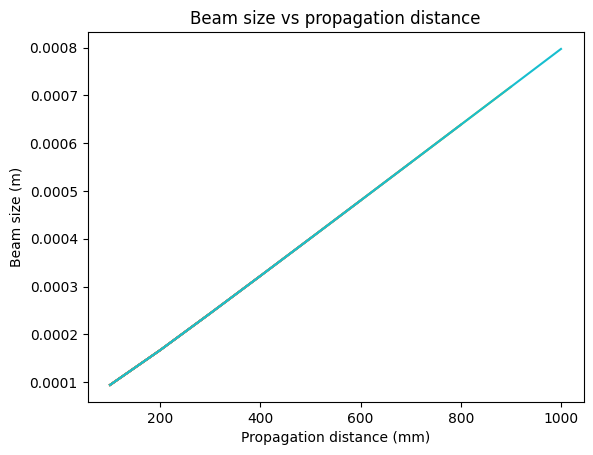

In [6]:
wavelength_m = 500e-9 #wavelength, m

dx_m = 1e-6 #grid size
Dx_m = 1 #screen size
x_m = np.linspace(-Dx_m/2, Dx_m/2, int(Dx_m/dx_m)+1)

beam_sizes_m = []
distances_m = []

for i in range(100, 1100, 100):
    zp_m = i*1e-3 #propagation distance, m

    E0 = np.sqrt(g)
    Ep = propTF(E0, Dx_m, wavelength_m, zp_m)

    Ip = np.abs(Ep)**2
    
    I_max = np.max(Ip)
    I_level = I_max / 2
    idx = np.where(Ip >= I_level)[0]
    if len(idx) > 1: # check that there are at least 2 points (not just the peak)
        x_mean = np.sum(x_m * Ip) / np.sum(Ip)
        x_std_mean = np.sqrt(np.sum((x_m - x_mean)**2 * Ip) / np.sum(Ip))
        
        beam_sizes_m.append(x_std_mean)
        distances_m.append(i)

    plt.plot(distances_m, beam_sizes_m)
    plt.title("Beam size vs propagation distance")
    plt.xlabel("Propagation distance (mm)")
    plt.ylabel("Beam size (m)")


In [7]:
# theoretical, should match above 

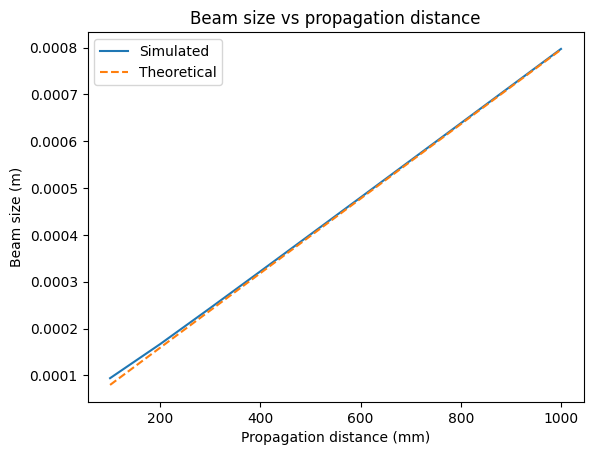

In [8]:
div_rad = wavelength_m/(4*np.pi*x_std_m) #in radians
prop_size = div_rad*zp_m #in meters

prop_sizes_m = div_rad*np.array(distances_m)*1e-3

plt.plot(distances_m, beam_sizes_m, label='Simulated')
plt.plot(distances_m, prop_sizes_m, label='Theoretical', linestyle='--')
plt.title("Beam size vs propagation distance")
plt.xlabel("Propagation distance (mm)")
plt.ylabel("Beam size (m)")
plt.legend()

In [9]:
div_rad

0.0007957747154594767

In [10]:
distances_m

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

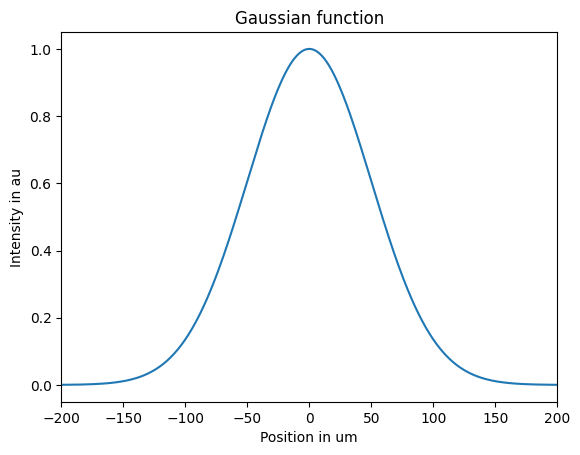

In [11]:
# copied from above 

def propTF(uin_V_m, L_m, lambda_m, z_m):
    M = uin_V_m.size        # number of samples (grid points)
    dx_m = L_m/M            # grid spacing
    k_1_m = 2*np.pi/lambda_m # wavenumber

    # Frequency coordinates
    fx_1_m = np.linspace(-1/(2*dx_m), 1/(2*dx_m) - (1/L_m), M)
    
    # Transfer function for Fresnel propagation
    H = np.exp(-1j * np.pi * lambda_m * z_m * (fx_1_m**2))
    H = np.fft.fftshift(H)

    # Fourier transform input field
    Uin_V_m = np.fft.fft(np.fft.fftshift(uin_V_m))

    # Multiply in Fourier space
    Uout_V_m = H * Uin_V_m

    # Inverse FFT → propagated field
    uout_V_m = np.fft.ifftshift(np.fft.ifft(Uout_V_m))
    return uout_V_m


dx_m = 1e-6 #grid size, m:meter
Dx_m = 1 #screen size
x_m = np.linspace(-Dx_m/2, Dx_m/2, int(Dx_m/dx_m)+1)

x_mean_m = 0.0 #centered on...
x_std_m = 50e-6 #widthofgaussian
g = np.exp(-(x_m - x_mean_m)**2/(2*(x_std_m**2))) # gaussian intensity distribution 
plt.plot(x_m*1e6, g)
plt.xlabel("Position in um")
plt.ylabel("Intensity in au") #arbitrary units
plt.title("Gaussian function")
plt.xlim(-200, 200)
plt.show()

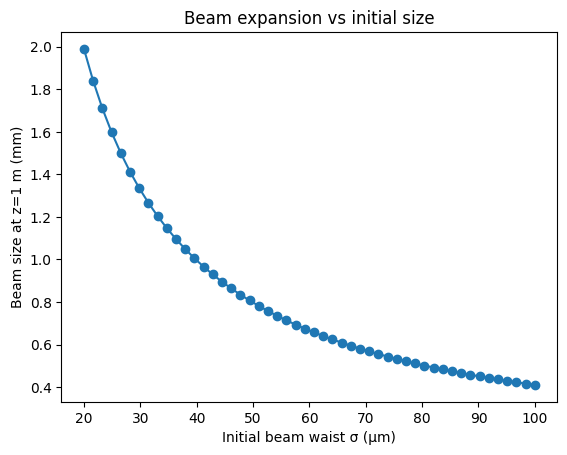

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Effect of decreasing input beam size
# -------------------------
beam_waists_m = np.linspace(20e-6, 100e-6, 50)  # initial sizes
beam_size_at_1m = []

for i in beam_waists_m:
    g = np.exp(-(x_m**2)/(2*i**2))   # Gaussian intensity
    E0 = np.sqrt(g)                      # field amplitude
    
    Ep = propTF(E0, Dx_m, wavelength_m, 1.0)  # propagate to z=1 m
    Ip = np.abs(Ep)**2
    
    # Compute beam size
    x_mean = np.sum(x_m * Ip) / np.sum(Ip)  # center of mass
    x_std = np.sqrt(np.sum((x_m - x_mean)**2 * Ip) / np.sum(Ip))
    beam_size_at_1m.append(x_std)

plt.figure()
plt.plot(np.array(beam_waists_m)*1e6, np.array(beam_size_at_1m)*1e3, 'o-')
plt.xlabel("Initial beam waist σ (µm)")
plt.ylabel("Beam size at z=1 m (mm)")
plt.title("Beam expansion vs initial size")
plt.show()

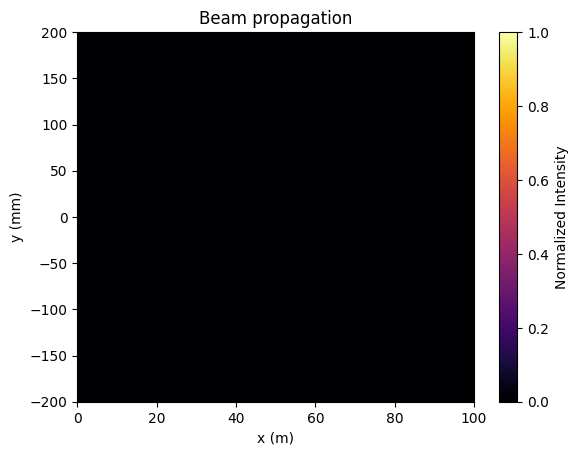

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 2. Plot of beam as it travels
# -------------------------

Dx_m = 1  # total transverse window 
dx_m = 1e-6    
x_m = np.linspace(0, Dx_m, int(Dx_m/dx_m)+1)


init_beam_size_m = 50e-6  # initial size
g = np.exp(-(x_m**2)/(2*init_beam_size_m**2)) # 1D Gaussian function along spatial grid x_m, 
                                              # evaluates the Gaussian intensity profile at each x position
E0 = np.sqrt(g) # initial field amplitude 

# Propagation distances (negative and positive)
Z = np.linspace(-0.2, 0.2, 200)  # from -0.2 m to +0.2 m
I_zx = []                        # 2D array to store intensity vs x and z

for z in Z:
    Ep = propTF(E0, Dx_m, wavelength_m, z)  # propagate
    Ip = np.abs(Ep)**2                      # intensity
    Ip = Ip / Ip.max()                      # normalize to max=1 for plotting
    I_zx.append(Ip)

# Convert list to 2D array
I_zx = np.array(I_zx)


# Display with imshow (x vs z)
plt.figure()
plt.imshow(I_zx,
           extent=[x_m[0]*1e2, x_m[-1]*1e2, Z[0]*1e3, Z[-1]*1e3],  # x in cm, z in mm
           aspect='auto',
           cmap='inferno',
           origin='lower')
# I_zx is a 2D array of normalized intensity: 
# Rows correspond to z positions (propagation distance)
# Columns correspond to x positions (transverse beam axis)

# extent=[x_m[0]*1e3, x_m[-1]*1e3, Z[0]*1e3, Z[-1]*1e3]
# Maps the pixel indices to physical coordinates:
# x from x_m[0] → x_m[-1]
# z from Z[0] → Z[-1]

# aspect='auto'
# Lets matplotlib automatically adjust the aspect ratio so the plot fills the figure.

# cmap='inferno'
# Sets the color map to “inferno” (dark → bright for low → high intensity).

# origin='lower'
# Makes the first row of I_zx correspond to the bottom of the plot (lowest z), not the top.

plt.colorbar(label="Normalized Intensity")
plt.xlabel("x (m)")
plt.ylabel("y (mm)")
plt.title("Beam propagation")
plt.show()


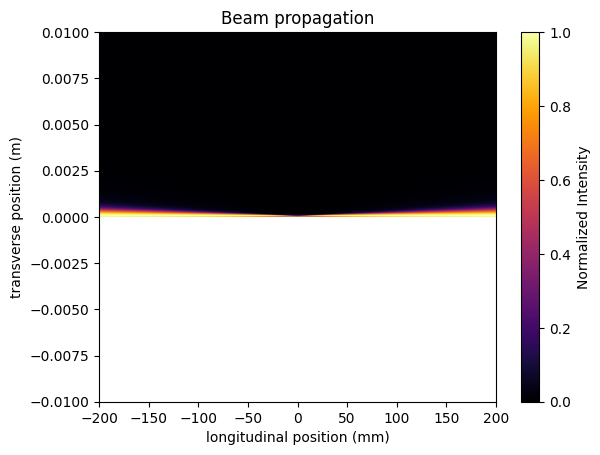

In [35]:
# Display with imshow (x vs z)
plt.figure()
plt.imshow(np.transpose(I_zx),
           extent=[Z[0]*1e3, Z[-1]*1e3,x_m[0], x_m[-1]],
           aspect='auto',
           cmap='inferno',
           origin='lower')
# I_zx is a 2D array of normalized intensity: 
# Rows correspond to z positions (propagation distance)
# Columns correspond to x positions (transverse beam axis)

# extent=[x_m[0]*1e3, x_m[-1]*1e3, Z[0]*1e3, Z[-1]*1e3]
# Maps the pixel indices to physical coordinates:
# x from x_m[0] → x_m[-1]
# z from Z[0] → Z[-1]

# aspect='auto'
# Lets matplotlib automatically adjust the aspect ratio so the plot fills the figure.

# cmap='inferno'
# Sets the color map to “inferno” (dark → bright for low → high intensity).

# origin='lower'
# Makes the first row of I_zx correspond to the bottom of the plot (lowest z), not the top.

plt.colorbar(label="Normalized Intensity")
plt.xlabel("longitudinal position (mm)")
plt.ylabel("transverse position (m)")
plt.ylim([-0.01, 0.01])
plt.title("Beam propagation")
plt.show()

In [32]:
Z[100]

IndexError: index 100 is out of bounds for axis 0 with size 100

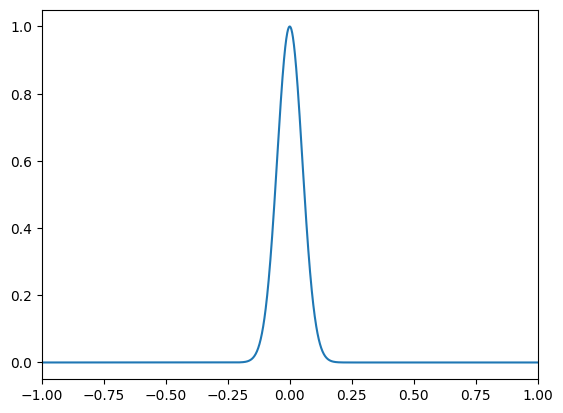

In [22]:
plt.plot(x_m*1e3,I_zx[1,:])
plt.xlim([-1,1])
plt.show()

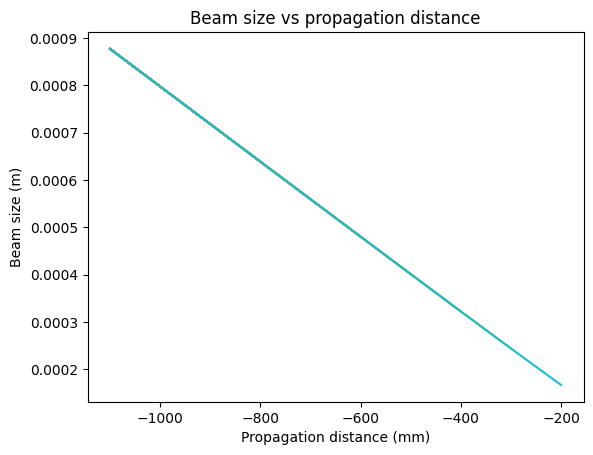

In [17]:
# 3. Negative propagation distance 
# ------------------------- 

import numpy as np
import matplotlib.pyplot as plt


wavelength_m = 500e-9 #wavelength, m

dx_m = 1e-6 #grid size
Dx_m = 1 #screen size
x_m = np.linspace(-Dx_m/2, Dx_m/2, int(Dx_m/dx_m)+1)

beam_sizes_m = []
distances_m = []

for i in range(-1100, -100, 100):
    zp_m = i*1e-3 #propagation distance, m

    E0 = np.sqrt(g)
    Ep = propTF(E0, Dx_m, wavelength_m, zp_m)

    Ip = np.abs(Ep)**2
    
    I_max = np.max(Ip)
    I_level = I_max / 2
    idx = np.where(Ip >= I_level)[0]
    if len(idx) > 1: # check that there are at least 2 points (not just the peak)
        x_mean = np.sum(x_m * Ip) / np.sum(Ip)
        x_std_mean = np.sqrt(np.sum((x_m - x_mean)**2 * Ip) / np.sum(Ip))
        
        beam_sizes_m.append(x_std_mean)
        distances_m.append(i)

    plt.plot(distances_m, beam_sizes_m)
    plt.title("Beam size vs propagation distance")
    plt.xlabel("Propagation distance (mm)")
    plt.ylabel("Beam size (m)")

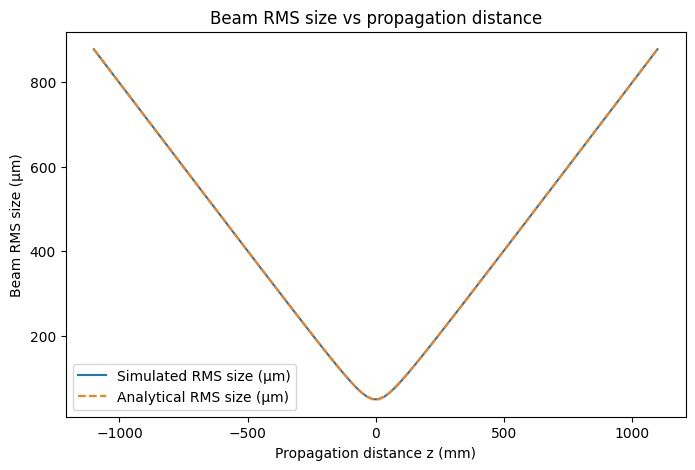

In [37]:
# 4. Analytical beam size 
# ------------------------- 

import numpy as np
import matplotlib.pyplot as plt

wavelength_m = 500e-9
dx_m = 1e-6
Dx_m = 1
x_m = np.linspace(-Dx_m/2, Dx_m/2, int(Dx_m/dx_m)+1)
sigma_rms_m = 50e-6  # initial beam size

g = np.exp(-(x_m**2)/(2*sigma_rms_m**2))
E0 = np.sqrt(g)

Z = np.linspace(-1.1, 1.1, 100)  # propagation from -1.1 m to +1.1 m
sim_beam_sizes = []

Ixz = np.zeros((len(Z), len(x_m)))
for z in Z:
    Ep = propTF(E0, Dx_m, wavelength_m, z)
    Ip = np.abs(Ep)**2
    Ixz[z == Z, :] = Ip / np.max(Ip)  # normalized intensity
    x_mean = np.sum(x_m * Ip) / np.sum(Ip)
    x_std = np.sqrt(np.sum((x_m - x_mean)**2 * Ip) / np.sum(Ip))
    sim_beam_sizes.append(x_std)

sim_beam_sizes = np.array(sim_beam_sizes)

# Analytical model for RMS beam size
divergence_rms_rad = wavelength_m / (4 * np.pi * sigma_rms_m)
S_z = np.sqrt(sigma_rms_m**2 + (divergence_rms_rad * Z)**2)

plt.figure(figsize=(8, 5))
plt.plot(Z*1e3, sim_beam_sizes*1e6, label="Simulated RMS size (µm)")
plt.plot(Z*1e3, S_z*1e6, '--', label="Analytical RMS size (µm)")
plt.xlabel("Propagation distance z (mm)")
plt.ylabel("Beam RMS size (µm)")
plt.title("Beam RMS size vs propagation distance")
plt.legend()
plt.show()

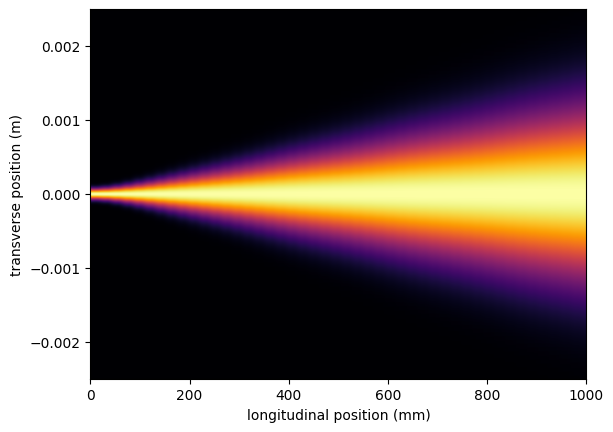

In [41]:
plt.imshow(np.transpose(Ixz),
           extent=[Z[0]*1e3, Z[-1]*1e3,x_m[0], x_m[-1]],
           aspect='auto',
           cmap='inferno')
plt.ylim([-0.0025, 0.0025])
plt.xlabel("longitudinal position (mm)")
plt.ylabel("transverse position (m)")
plt.xlim([0,1000])
plt.show()            
